In [4]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [20]:
svpath_ns = "../../../Data/difficult-synthetic/legendre_ns_d20_chi80.jld2";
dloc =  "../../../Data/difficult-synthetic/datasets/noisy_trendy_sine_eta_01_m_var2_tau_var3.jld2";

In [21]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [22]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 300 training samples and 200 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 80

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [23]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

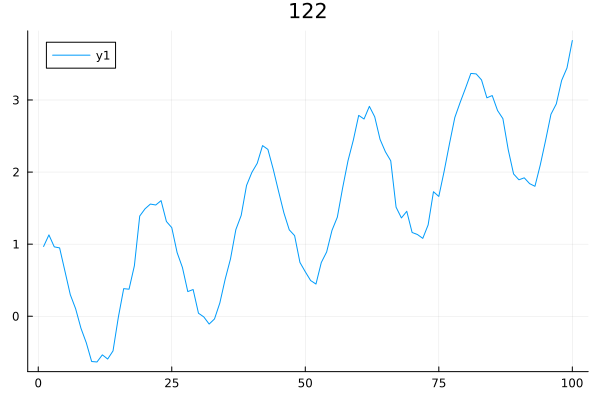

In [84]:
idx = rand(1:size(X_train, 1))
plot(X_train[idx, :], title="$idx")

In [90]:
max_jump=nothing
class = 0
interp_sites = collect(25:75)
instance_idx = 122
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, 
    xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);

(i, x_prev, mx) = (1, -0.1643747200650797, -0.0608)
(i, x_prev, mx) = (2, -0.0608, 0.0356)
(i, x_prev, mx) = (3, 0.0356, 0.0132)
(i, x_prev, mx) = (4, 0.0132, 0.0398)
(i, x_prev, mx) = (5, 0.0398, -0.0053)
(i, x_prev, mx) = (6, -0.0053, -0.017)
(i, x_prev, mx) = (7, -0.017, -0.0719)
(i, x_prev, mx) = (8, -0.0719, -0.1397)
(i, x_prev, mx) = (9, -0.1397, -0.2683)
(i, x_prev, mx) = (10, -0.2683, -0.3177)
(i, x_prev, mx) = (11, -0.3177, -0.3661)
(i, x_prev, mx) = (12, -0.3661, -0.4407)
(i, x_prev, mx) = (13, -0.4407, -0.5081)
(i, x_prev, mx) = (14, -0.5081, -0.5284)
(i, x_prev, mx) = (15, -0.5284, -0.5407)
(i, x_prev, mx) = (16, -0.5407, -0.5191)
(i, x_prev, mx) = (17, -0.5191, -0.486)
(i, x_prev, mx) = (18, -0.486, -0.3965)
(i, x_prev, mx) = (19, -0.3965, -0.341)
(i, x_prev, mx) = (20, -0.341, -0.2721)
(i, x_prev, mx) = (21, -0.2721, -0.2119)
(i, x_prev, mx) = (22, -0.2119, -0.1504)
(i, x_prev, mx) = (23, -0.1504, -0.1464)
(i, x_prev, mx) = (24, -0.1464, -0.0948)
(i, x_prev, mx) = (25, -0

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0784451 │
╰────────┴───────────╯


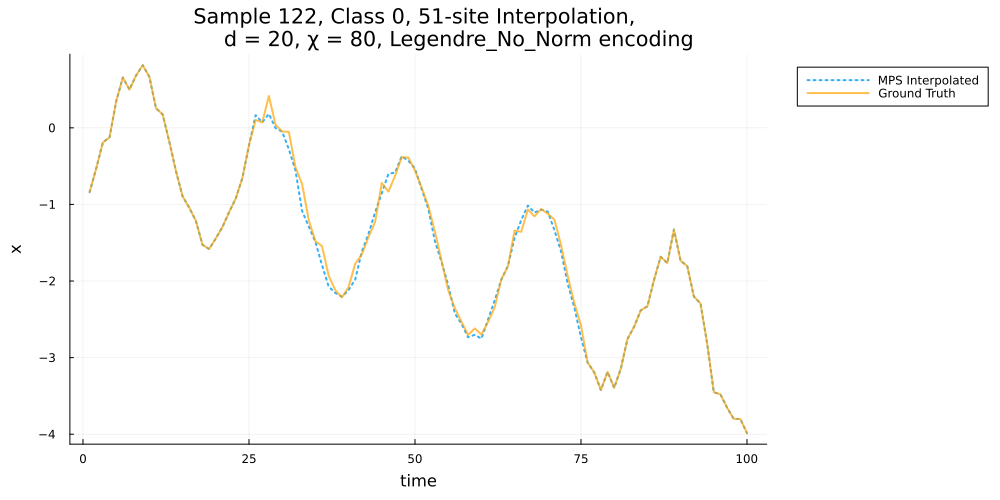

In [91]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)
#savefig("/Users/joshua/Desktop/QTNML_Stuff/VdP_interp/vdP_s96_nn.svg")